In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_save = pd.read_csv('/home/zlei/cargospace/5_7_merged_data.csv',index_col = 0)
df_save

,TFBS_chr,TFBS_start,TFBS_end,TFBS_strand,TFBS_score,fp_score,[2]POS,[3]REF,[4]ALT,VAF,Protein name,Cancer name
0,chr13,37201771,37201781,+,2.424468,0.021706,37201772,T,C,1.0,HXB7_HXB7_HUMAN.H11MO.0.C,1KEQR84_sample003
1,chr1,93106435,93106445,+,1.849734,0.025261,93106438,G,A,1.0,HXB7_HXB7_HUMAN.H11MO.0.C,1KEQR84_sample003
2,chr10,27367239,27367249,+,2.424468,0.051675,27367245,T,C,0.0,HXB7_HXB7_HUMAN.H11MO.0.C,1KEQR84_sample003
3,chr1,95575724,95575734,+,2.274308,0.015278,95575733,T,C,0.0,HXB7_HXB7_HUMAN.H11MO.0.C,1KEQR84_sample003
4,chr19,54283056,54283066,-,1.849734,0.105843,54283057,A,G,0.0,HXB7_HXB7_HUMAN.H11MO.0.C,1KEQR84_sample003
...,...,...,...,...,...,...,...,...,...,...,...,...
1757794,chr6,35797961,35797973,-,3.196945,0.052567,35797962,T,C,1.0,ZNF254_M07760_2.00,O697I0L_sample001
1757795,chr1,154851751,154851763,-,3.214737,0.053391,154851762,G,A,1.0,ZNF254_M07760_2.00,O697I0L_sample001
1757796,chr11,117734381,117734393,+,4.268656,0.086781,117734383,C,T,1.0,ZNF254_M07760_2.00,O697I0L_sample001
1757797,chr9,18680196,18680208,-,2.732011,0.021289,18680197,T,C,1.0,ZNF254_M07760_2.00,O697I0L_sample001


In [4]:
main_label = list(set(df_save['Cancer name'].tolist()))
use_label = []
for sub_label in main_label:
    df_temp = df_save[df_save['Cancer name'] == sub_label]
    df_temp_VAF_not_1 = df_temp[df_temp['VAF'] != 1.0]
    df_temp_VAF_not_1_0 = df_temp_VAF_not_1[df_temp_VAF_not_1['VAF'] != 0.0]
    if len(df_temp_VAF_not_1_0) > 400:
        use_label.append(sub_label)

In [5]:
len(use_label)

51

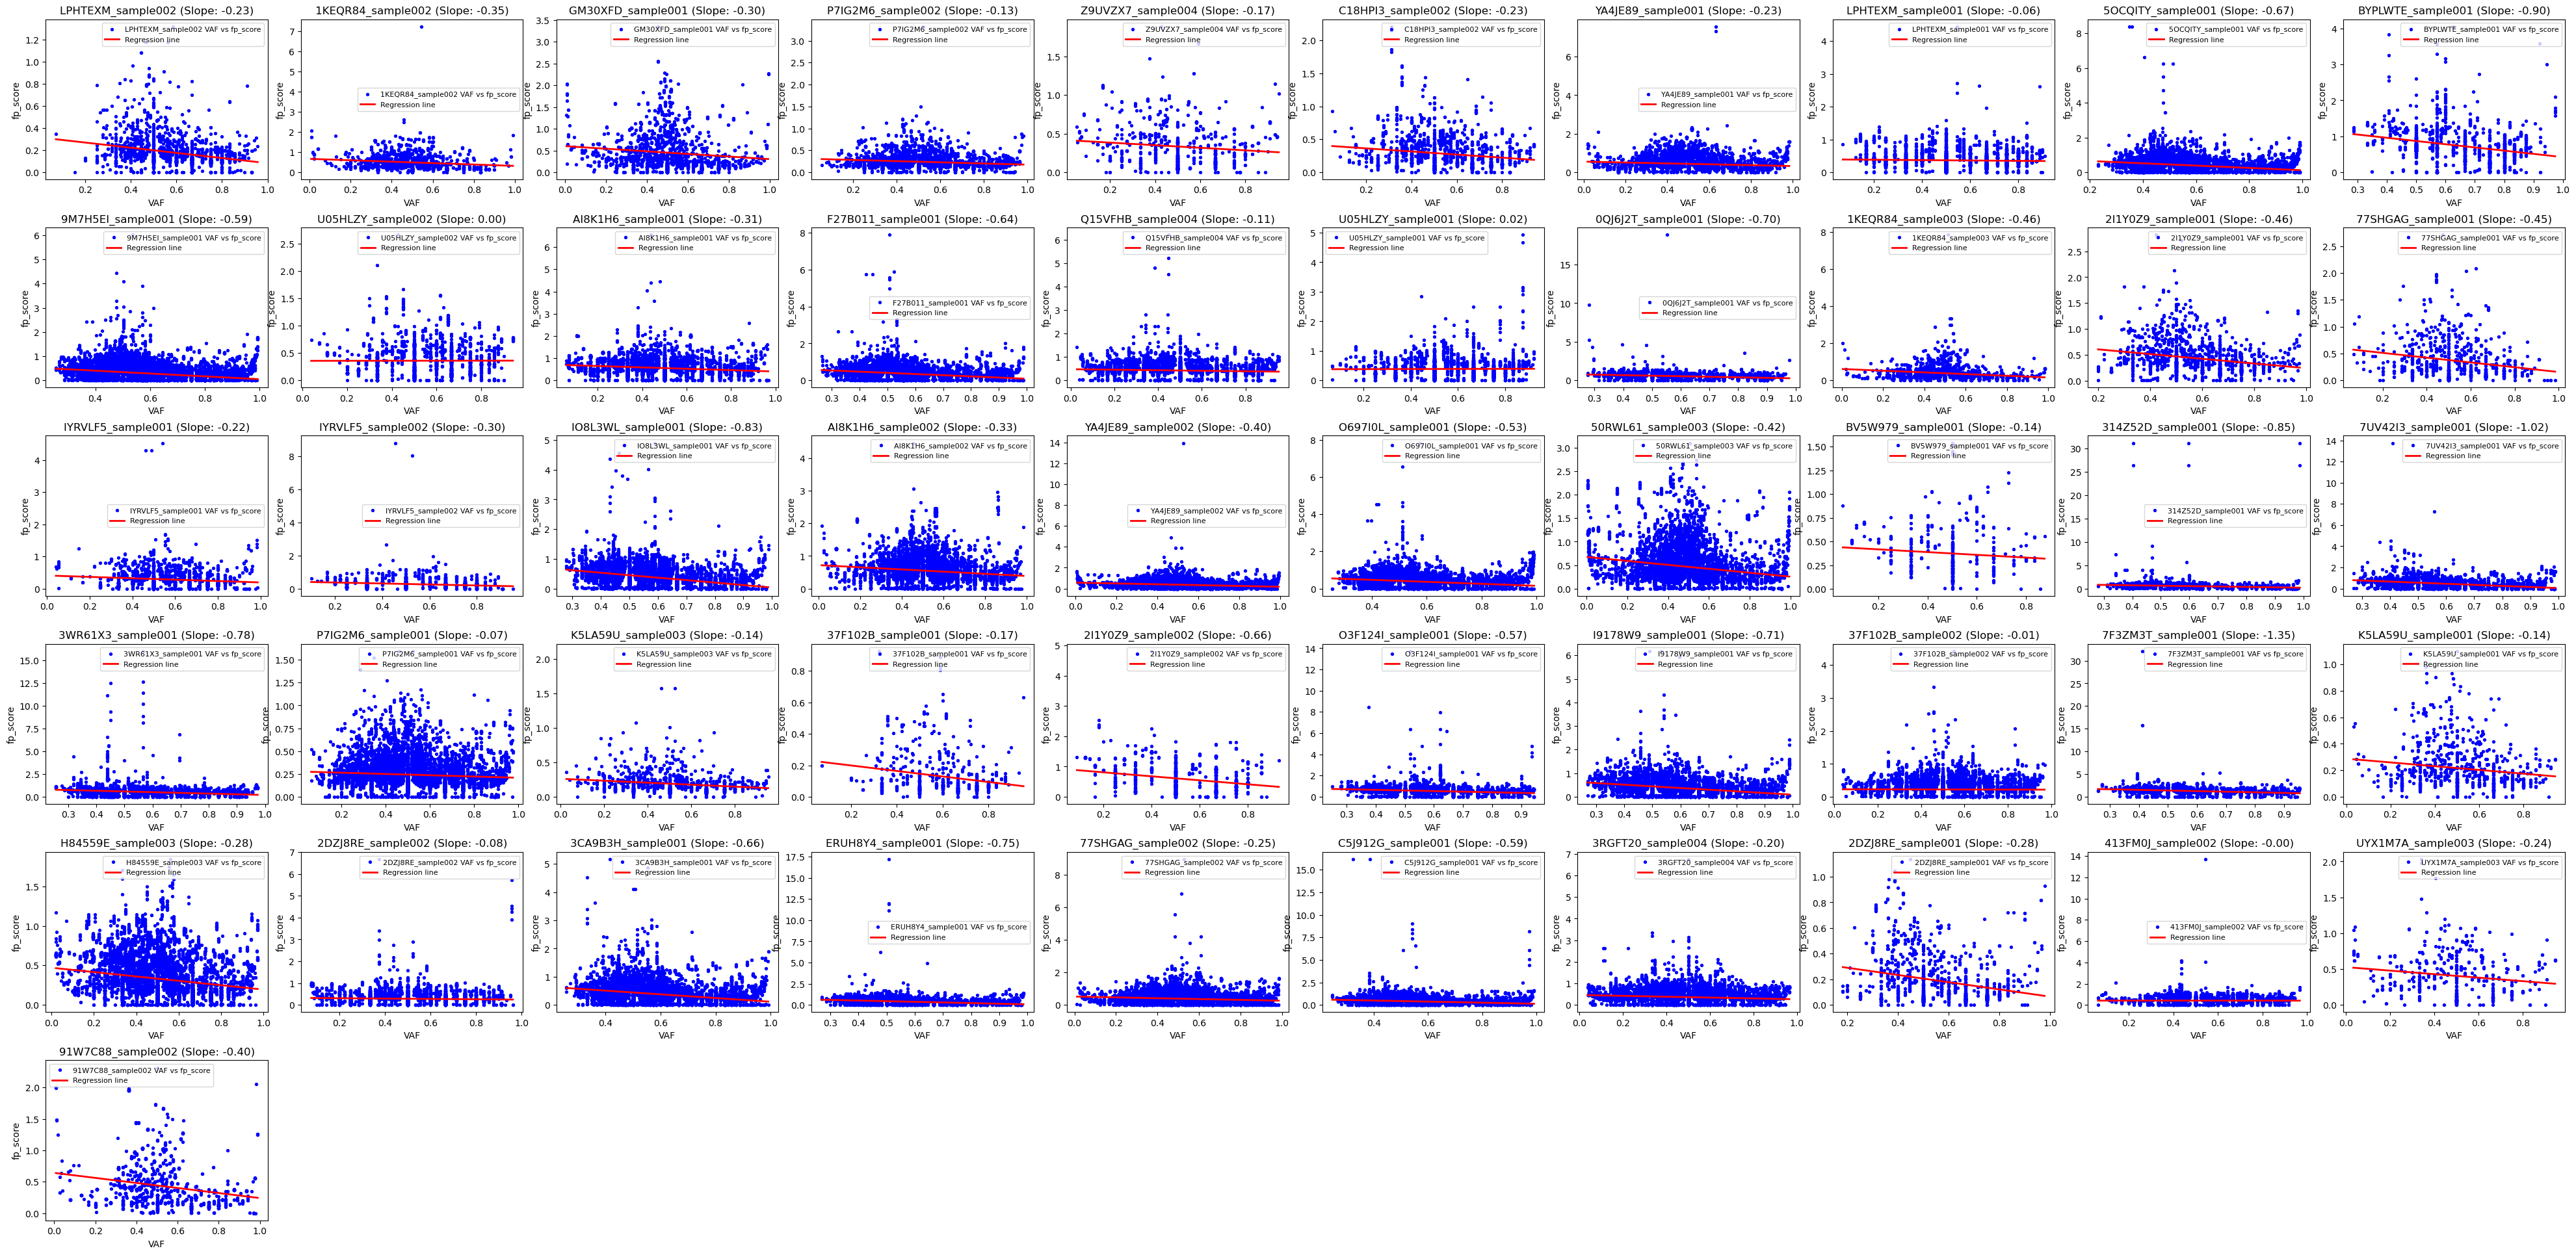

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

#main_label = list(set(df_save['Protein name'].tolist()))
    
colors = plt.cm.get_cmap('tab20', 38) 

labels = use_label

num_labels = len(labels)
cols = 10 
rows = (num_labels + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
fig.subplots_adjust(hspace=0.3, wspace=0.15)
wanted_label = []
all_slope = []

for i, label in enumerate(labels):
    ax = axes[i // cols, i % cols] 
    df_temp = df_save[df_save['Cancer name'] == label]
    df_temp_VAF_not_1 = df_temp[df_temp['VAF'] != 1.0]
    df_temp_VAF_not_1_0 = df_temp_VAF_not_1[df_temp_VAF_not_1['VAF'] != 0.0]
    
    x = np.array(df_temp_VAF_not_1_0['VAF'])
    y = np.array(df_temp_VAF_not_1_0['fp_score'])
    model = np.polyfit(x.flatten(), y.flatten(), 1)
    slope = model[0]
    all_slope.append(slope)
    
    if slope < -1.0:
        wanted_label.append(label)
    
    ax.scatter(df_temp_VAF_not_1_0['VAF'], df_temp_VAF_not_1_0['fp_score'],s=8,
               color = 'b', label=f'{label} VAF vs fp_score') 
    
    x_line = np.array([[np.min(x)], [np.max(x)]])
    y_line = model[1] + model[0] * x_line
    ax.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
    
    ax.set_title(f'{label} (Slope: {slope:.2f})', fontsize=12) 
    ax.set_xlabel('VAF', fontsize=10)
    ax.set_ylabel('fp_score', fontsize=10) 
    ax.legend(fontsize=8)

for j in range(i + 1, rows * cols):
    axes[j // cols, j % cols].axis('off')

#plt.savefig('Cancer_protein.png', dpi=300, format='png')
plt.show()

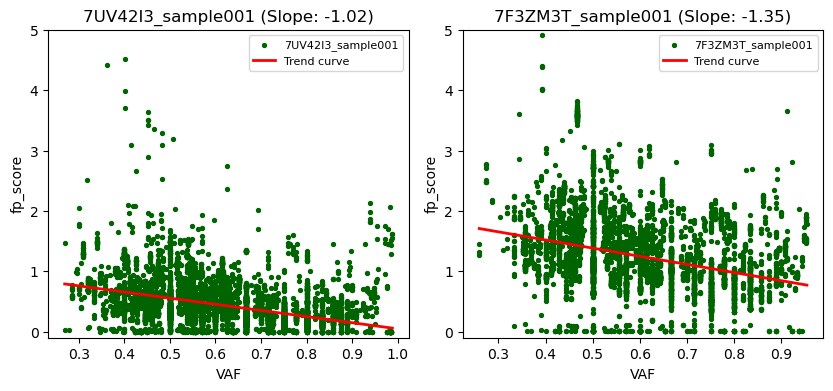

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

    
colors = plt.cm.get_cmap('tab20', 38) 

labels = wanted_label

num_labels = len(labels)
cols = 2 
rows = (num_labels + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
fig.subplots_adjust(hspace=0.3, wspace=0.15)

for i, label in enumerate(labels):
    ax = axes[ i % cols] 
    df_temp = df_save[df_save['Cancer name'] == label]
    df_temp_VAF_not_1 = df_temp[df_temp['VAF'] != 1.0]
    df_temp_VAF_not_1_0 = df_temp_VAF_not_1[df_temp_VAF_not_1['VAF'] != 0.0]
    
    x = np.array(df_temp_VAF_not_1_0['VAF'])
    y = np.array(df_temp_VAF_not_1_0['fp_score'])
    model = np.polyfit(x.flatten(), y.flatten(), 1)
    slope = model[0]
    
    ax.scatter(df_temp_VAF_not_1_0['VAF'], df_temp_VAF_not_1_0['fp_score'],s=8,
               color = 'darkgreen', label=f'{label}') 
    
    x_line = np.array([[np.min(x)], [np.max(x)]])
    y_line = model[1] + model[0] * x_line
    ax.plot(x_line, y_line, color='red', linewidth=2, label='Trend curve')
    
    ax.set_title(f'{label} (Slope: {slope:.2f})', fontsize=12) 
    ax.set_xlabel('VAF', fontsize=10)
    ax.set_ylabel('fp_score', fontsize=10) 
    ax.legend(fontsize=8)
    ax.set_ylim(-0.1, 5)

for j in range(i + 1, rows * cols):
    axes[j // cols, j % cols].axis('off')

#plt.savefig('Cancer_protein.png', dpi=300, format='png')
plt.show()

In [34]:
wanted_label

['7UV42I3_sample001', '7F3ZM3T_sample001']

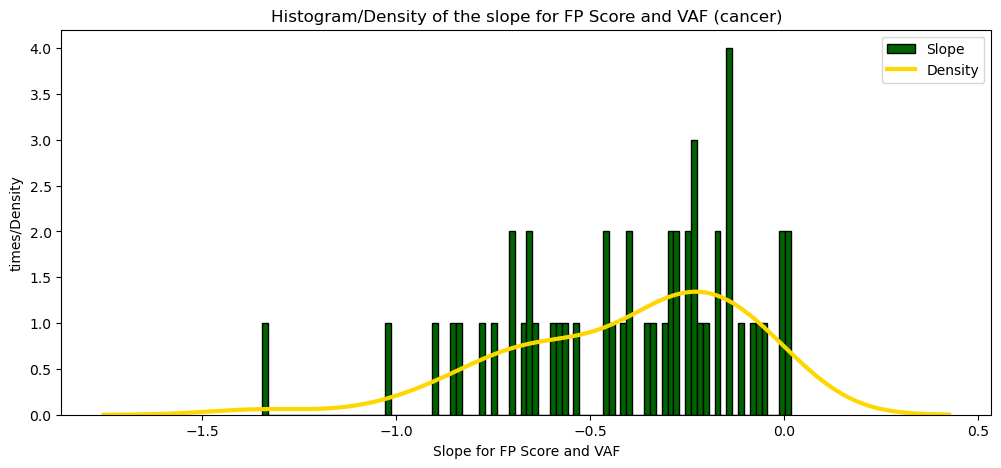

In [9]:
plt.figure(figsize=(12, 5))
plt.hist(all_slope, bins=90, edgecolor='black',color = 'darkgreen',label = "Slope")
sns.kdeplot(all_slope, linewidth=3,color = 'Gold',label = "Density")

plt.title('Histogram/Density of the slope for FP Score and VAF (cancer)')
plt.ylabel('times/Density')
plt.xlabel('Slope for FP Score and VAF')
plt.legend() 

plt.show()

<Axes: ylabel='Density'>

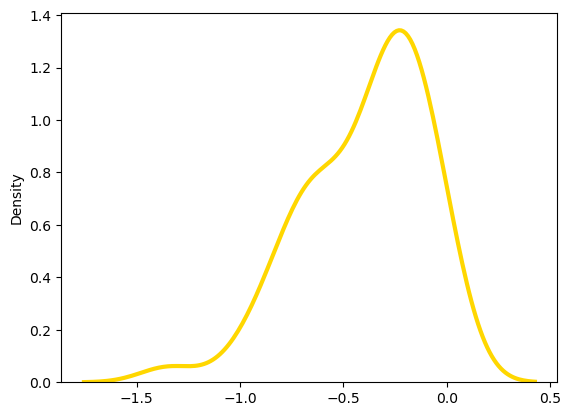

In [8]:
sns.kdeplot(all_slope, linewidth=3,color = 'Gold',label = "Density")